In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("regression_datasets_large.xlsx - Electricity_Bill.csv")

X = df[["Units_Consumed"]]
y = df["Bill_Amount"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_
print("Slope (m):", slope)
print("Intercept (c):", intercept)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

bill_pred = model.predict(np.array([[350]]))
print("Predicted bill for 350 units:", bill_pred[0])

print("\nCorrelation between Units_Consumed and Bill_Amount:")
print(df[["Units_Consumed", "Bill_Amount"]].corr())




Slope (m): 9.935205014549878
Intercept (c): -37.25733007947247
Mean Squared Error: 3251.3553368216785
R² Score: 0.9987257055279478
Predicted bill for 350 units: 3440.064425012985

Correlation between Units_Consumed and Bill_Amount:
                Units_Consumed  Bill_Amount
Units_Consumed        1.000000     0.999092
Bill_Amount           0.999092     1.000000


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


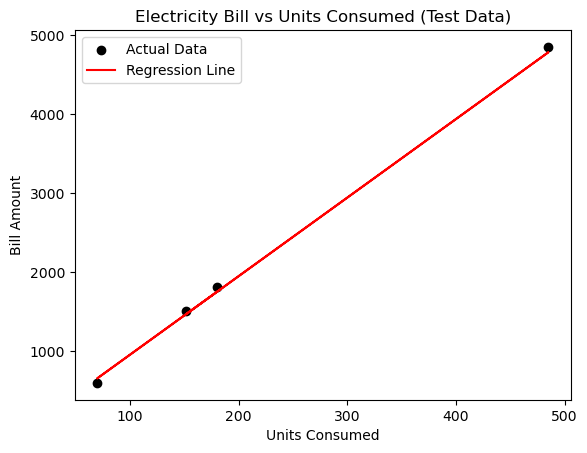

In [8]:
# Visualization
plt.scatter(X_test, y_test, color="black", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Units Consumed")
plt.ylabel("Bill Amount")
plt.title("Electricity Bill vs Units Consumed (Test Data)")
plt.legend()
plt.show()

In [9]:
import pickle

filename = "trained_model.sav"
with open(filename, "wb") as f:
    pickle.dump(model, f)

with open(filename, "rb") as f:
    loaded_model = pickle.load(f)
